In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully")


Libraries imported successfully


In [82]:
df = pd.read_csv('GoogleStockPrices.csv')
print("Dataset loaded successfully")


Dataset loaded successfully


In [83]:
df.head(10)


,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224
5,2015-01-09 16:00:00,25.42,25.43,24.93,25.04,2100024
6,2015-01-12 16:00:00,24.96,25.01,24.55,24.85,2856938
7,2015-01-13 16:00:00,25.12,25.43,24.86,25.09,3050295
8,2015-01-14 16:00:00,25.02,25.41,24.91,25.30,2639959
9,2015-01-15 16:00:00,25.45,25.49,25.10,25.20,2556682


In [84]:
df.tail(10)


,Date,Open,High,Low,Close,Volume
2506,2024-12-17 16:00:00,197.25,201.42,194.98,195.42,43504025
2507,2024-12-18 16:00:00,195.22,197.00,187.74,188.40,34166074
2508,2024-12-19 16:00:00,191.63,193.03,188.38,188.51,32265241
2509,2024-12-20 16:00:00,185.78,192.89,185.22,191.41,63462934
2510,2024-12-23 16:00:00,192.62,195.10,190.15,194.63,25675014
2511,2024-12-24 13:05:00,194.84,196.11,193.78,196.11,10403259
2512,2024-12-26 16:00:00,195.15,196.75,194.38,195.60,12057210
2513,2024-12-27 16:00:00,194.95,195.32,190.65,192.76,18891362
2514,2024-12-30 16:00:00,189.80,192.55,189.12,191.24,14264659
2515,2024-12-31 16:00:00,191.08,191.96,188.51,189.30,17466919


In [85]:
df.sample(5)


,Date,Open,High,Low,Close,Volume
585,2017-05-01 16:00:00,46.21,46.79,46.04,46.64,2327782
1177,2019-09-06 16:00:00,60.46,60.65,60.16,60.32,948580
2356,2024-05-14 16:00:00,169.77,171.25,168.80,170.34,25127138
1562,2021-03-18 16:00:00,102.41,103.44,100.96,101.07,1585648
2246,2023-12-05 16:00:00,128.95,132.14,128.25,130.99,27384784


## Questions Before Analysis
- How has Google stock price changed over time?
- Are there extreme price movements or anomalies?
- Is the stock price data skewed?
- Are there any outliers in price values?
- How strongly are Open, High, Low, and Close prices correlated?
- Are there any data quality issues such as missing or duplicate values?


In [86]:
df.shape


(2516, 6)

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Open    2516 non-null   float64
 2   High    2516 non-null   float64
 3   Low     2516 non-null   float64
 4   Close   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [88]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [89]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [90]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,2516,2020-01-01 11:02:23.799682048,2015-01-02 16:00:00,2017-07-02 22:00:00,2020-01-01 16:00:00,2022-06-30 22:00:00,2024-12-31 16:00:00,NaN
Open,2516.0,82.678052,24.96,47.3675,64.53,119.665,197.25,43.716508
High,2516.0,83.560413,25.01,47.6375,65.045,121.0425,201.42,44.214494
Low,2516.0,81.831208,24.55,47.0,63.935,118.5925,194.98,43.257158
Close,2516.0,82.714996,24.85,47.38,64.71,119.7,196.66,43.735891
Volume,2516.0,8797571.627583,465638.0,1398751.0,1876044.0,6056782.5,119455020.0,13653052.161804


In [91]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [92]:
df.duplicated().sum()


np.int64(0)

In [93]:
df['Daily_Range'] = df['High'] - df['Low']


In [94]:
df['Daily_Return'] = df['Close'].pct_change()


In [95]:
df[['Open','High','Low','Close','Volume','Daily_Range']].skew()


,0
Open,0.624064
High,0.619095
Low,0.627129
Close,0.622465
Volume,2.162019
Daily_Range,1.569890


In [96]:
price_cols = ['Open','High','Low','Close']

Q1 = df[price_cols].quantile(0.25)
Q3 = df[price_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[price_cols] < (Q1 - 1.5 * IQR)) |
            (df[price_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()


,0
Open,0
High,0
Low,0
Close,0


In [97]:
df[['Open','High','Low','Close','Volume']].corr()


,Open,High,Low,Close,Volume
Open,1.000000,0.999807,0.999787,0.999546,0.552140
High,0.999807,1.000000,0.999763,0.999788,0.555178
Low,0.999787,0.999763,1.000000,0.999816,0.550009
Close,0.999546,0.999788,0.999816,1.000000,0.552211
Volume,0.552140,0.555178,0.550009,0.552211,1.000000


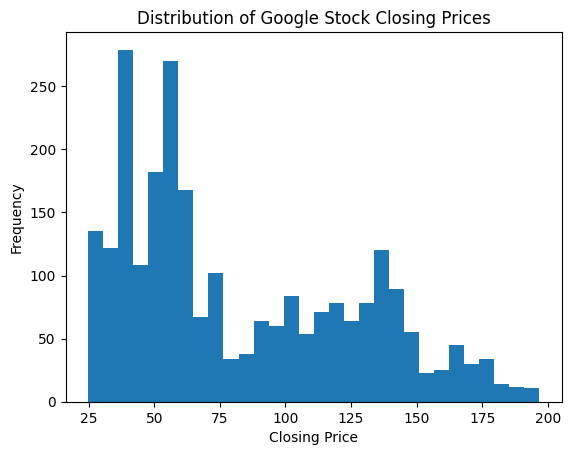

In [98]:
plt.figure()
plt.hist(df['Close'].dropna(), bins=30)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Google Stock Closing Prices')
plt.show()


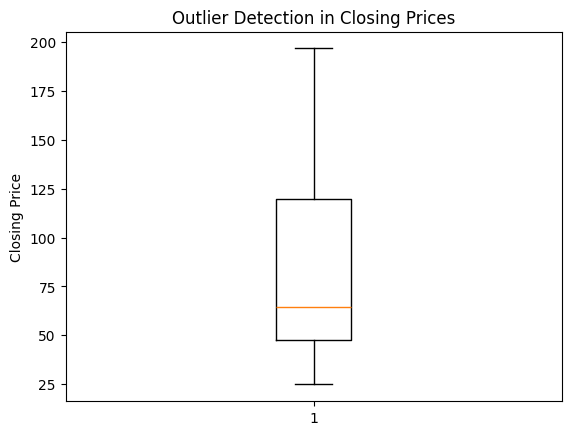

In [99]:
plt.figure()
plt.boxplot(df['Close'].dropna())
plt.ylabel('Closing Price')
plt.title('Outlier Detection in Closing Prices')
plt.show()


In [100]:
summary = {
    'Total Rows': df.shape[0],
    'Total Columns': df.shape[1],
    'Missing Values': df.isnull().sum().sum(),
    'Duplicate Rows': df.duplicated().sum()
}

pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])


,Value
Total Rows,2516
Total Columns,8
Missing Values,1
Duplicate Rows,0


## Conclusion
The exploratory data analysis of Google stock prices shows clear trends with periods of volatility. Statistical analysis and visual inspection reveal skewed distributions and the presence of extreme price movements. Price-related variables exhibit strong correlation, and the dataset demonstrates good data quality with minimal missing or duplicate values. Overall, the dataset is suitable for further financial analysis.
